In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sloan-digital-sky-survey/Skyserver_SQL2_27_2018 6_51_39 PM.csv


# Galaxy Distribution in Space

Galaxy was a favourite object in cosmological research about expanding universe. Long time ago, galaxies soar in narrow space, resulting in collision between galaxies and forms elliptical galaxy. 

Redshift value shows the lookup on how early was the galaxy formed in universe. Edwin Hubble formulate the redshift into how shifted the wavelength of galaxy, thus indicating the radial velocity


\begin{align}
z = \frac{v}{c} = \frac{\lambda_{v}-\lambda_{0}}{\lambda_{0}}
\end{align}

Hubble's law could be stated in
\begin{align}
v = \frac{H_{0}}{d}
\end{align}

### Reference: 
* Ryden, Barbara. Introduction to cosmology. Cambridge University Press, 2017.

In [2]:
df = pd.read_csv('/kaggle/input/sloan-digital-sky-survey/Skyserver_SQL2_27_2018 6_51_39 PM.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


We need to locate galaxies within the dataset, and take their attribute

In [3]:
dfgal = df.loc[(df["class"]) == 'GALAXY']
dfgal.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400
14,1.237650e+18,184.189574,0.099482,19.25667,17.54869,16.63578,16.14922,15.76639,752,301,4,271,3.243660e+17,GALAXY,0.072087,288,52000,389
19,1.237650e+18,184.380919,0.174323,17.81661,16.86976,16.53884,16.19576,16.08668,752,301,4,273,3.233070e+17,GALAXY,0.072772,287,52023,632


For map the location of galaxy, we need to plot the cartesian space coordinate from the equatorial coordinate. This one formulated from the galactic coordinate, known distance, galactic longitude, and galactic latitude. 


![Galactic Coordinate](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Galactic_coordinates.JPG/220px-Galactic_coordinates.JPG)

\begin{align}
Image: Wikipedia
\end{align}

Galactic coordinate could be formulated into

\begin{align}
sin(b) = sin(\delta_{NGP}) \ cos(i_{g})  -  cos(\delta) \ sin(\alpha - \alpha_{NGP}) \ sin(i_{g})
\end{align}

\begin{align}
cos(b) \ cos(l-l_{0}) = cos(\delta) \ cos(\alpha - \alpha_{NG})
\end{align}

\begin{align}
cos(b) \ sin(l-l_{0}) = sin(\delta) \ sin(i_{g}) + cos (\delta) \ sin(\alpha - \alpha_{NGP})\ cos(i_{g})
\end{align}

Known $i = 62.6^{o}, \alpha_{N} = 282.5^{o}, l_{0} = 33.0^{o}$

Source: https://www.ucl.ac.uk/~ucapsj0/galcor.pdf

For the ease, thanks to kaggle, they provide astropy

In [4]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

radec = SkyCoord(ra=dfgal['ra']*u.degree, dec=dfgal['dec']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic

dfgal['l'] = galactic.l.value
dfgal['b'] = galactic.b.value


r = cosmo.comoving_distance(dfgal['redshift'])
dfgal['distance']= r.value

dfgal.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,objid,ra,dec,u,g,r,i,z,run,rerun,...,field,specobjid,class,redshift,plate,mjd,fiberid,l,b,distance
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,...,268,3.232740e+17,GALAXY,0.123111,287,52023,513,283.339557,61.593309,517.978265
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,...,269,3.232870e+17,GALAXY,0.100242,287,52023,559,283.775497,61.545469,423.983759
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,...,270,3.243690e+17,GALAXY,0.040508,288,52000,400,283.956802,61.636921,173.648492
14,1.237650e+18,184.189574,0.099482,19.25667,17.54869,16.63578,16.14922,15.76639,752,301,...,271,3.243660e+17,GALAXY,0.072087,288,52000,389,284.382394,61.715884,306.853300
19,1.237650e+18,184.380919,0.174323,17.81661,16.86976,16.53884,16.19576,16.08668,752,301,...,273,3.233070e+17,GALAXY,0.072772,287,52023,632,284.726368,61.841409,309.720122


In [5]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(dfgal['distance'],dfgal['ra'],dfgal['dec'])
dfgal['x_coord'] = cart[0]
dfgal['y_coord'] = cart[1]
dfgal['z_coord'] = cart[2]

dfgal.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,objid,ra,dec,u,g,r,i,z,run,rerun,...,redshift,plate,mjd,fiberid,l,b,distance,x_coord,y_coord,z_coord
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,...,0.123111,287,52023,513,283.339557,61.593309,517.978265,-516.908863,-33.247690,1.140766
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,...,0.100242,287,52023,559,283.775497,61.545469,423.983759,-423.019754,-28.574390,0.142084
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,...,0.040508,288,52000,400,283.956802,61.636921,173.648492,-173.230902,-12.032967,0.247386
14,1.237650e+18,184.189574,0.099482,19.25667,17.54869,16.63578,16.14922,15.76639,752,301,...,0.072087,288,52000,389,284.382394,61.715884,306.853300,-306.032861,-22.417660,0.532788
19,1.237650e+18,184.380919,0.174323,17.81661,16.86976,16.53884,16.19576,16.08668,752,301,...,0.072772,287,52023,632,284.726368,61.841409,309.720122,-308.813767,-23.658476,0.942324


## Plot the Galaxies Location

After we know the cartesian coordinate of galaxies, we could plot it in space. Zero indicates our galaxy (exactly our sun, which is negligible distance in mpc scale).

The lack of dots in 

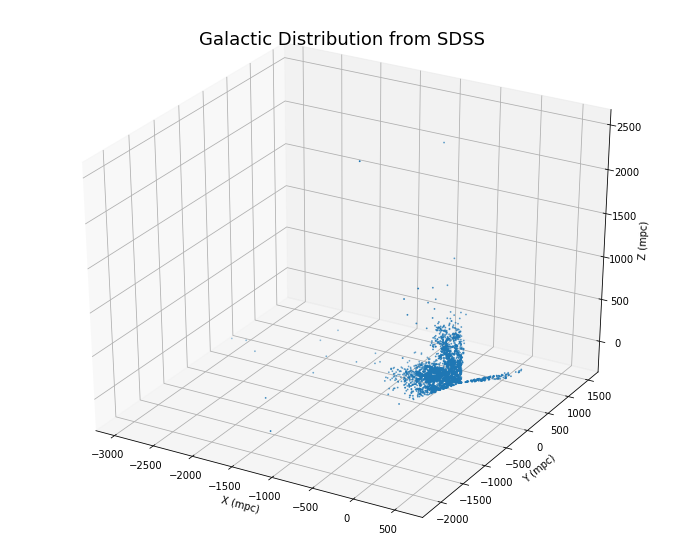

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfgal['x_coord'],dfgal['y_coord'],dfgal['z_coord'], s = 0.7)
ax.set_xlabel('X (mpc)')
ax.set_ylabel('Y (mpc)')
ax.set_zlabel('Z (mpc)')
ax.set_title('Galactic Distribution from SDSS',fontsize=18)
plt.show()



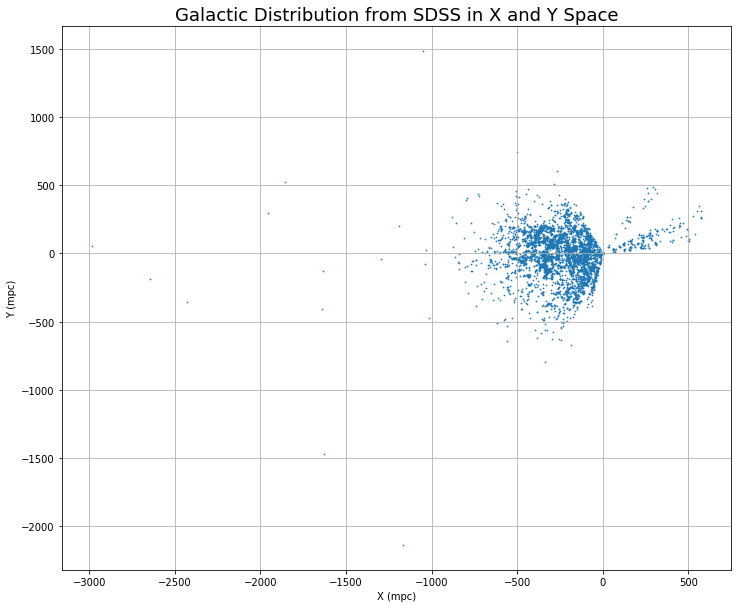

In [13]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(dfgal['x_coord'],dfgal['y_coord'], s = 0.5)
ax.grid()
ax.set_xlabel('X (mpc)')
ax.set_ylabel('Y (mpc)')
ax.set_title('Galactic Distribution from SDSS in X and Y Space',fontsize=18)
plt.show()

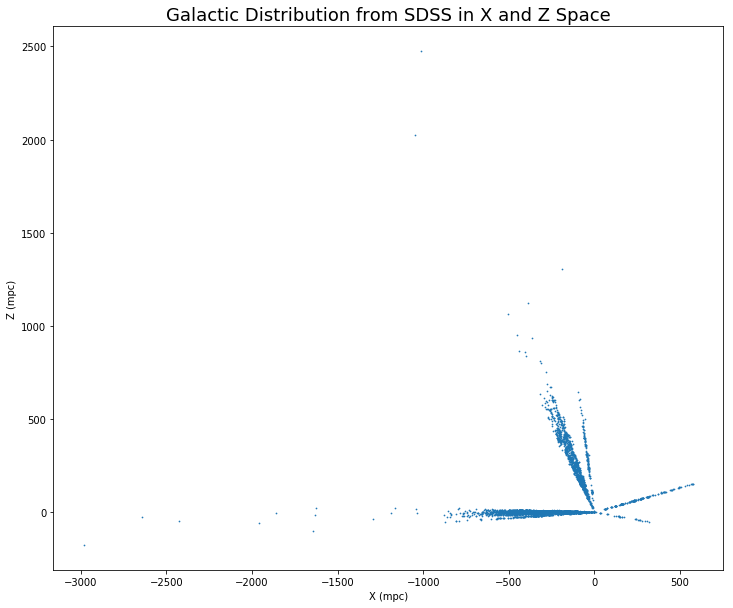

In [8]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(dfgal['x_coord'],dfgal['z_coord'], s = 0.5)
ax.grid()
ax.set_xlabel('X (mpc)')
ax.set_ylabel('Z (mpc)')
ax.set_title('Galactic Distribution from SDSS in X and Z Space',fontsize=18)
plt.show()

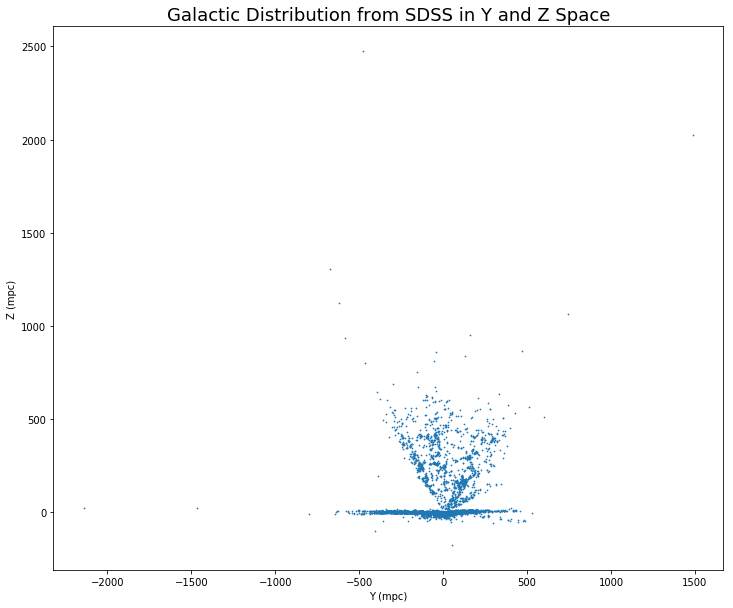

In [9]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(dfgal['y_coord'],dfgal['z_coord'], s = 0.5)
ax.grid()
ax.set_xlabel('Y (mpc)')
ax.set_ylabel('Z (mpc)')
ax.set_title('Galactic Distribution from SDSS in Y and Z Space',fontsize=18)
plt.show()

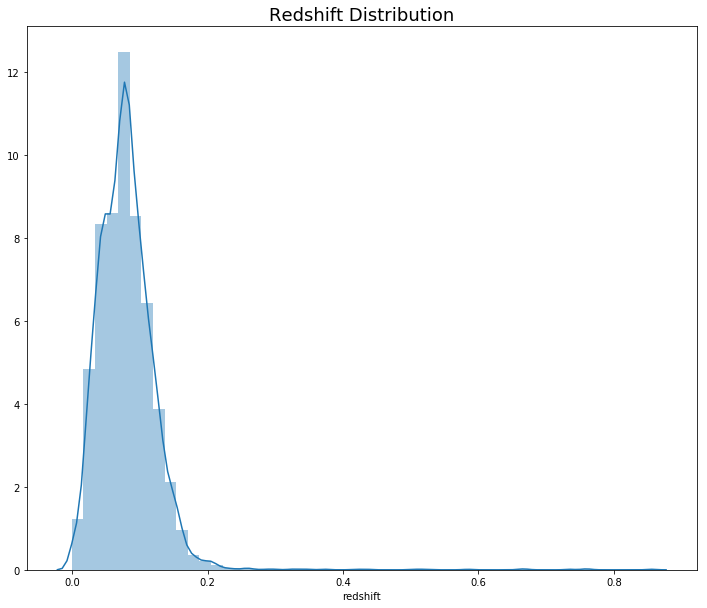

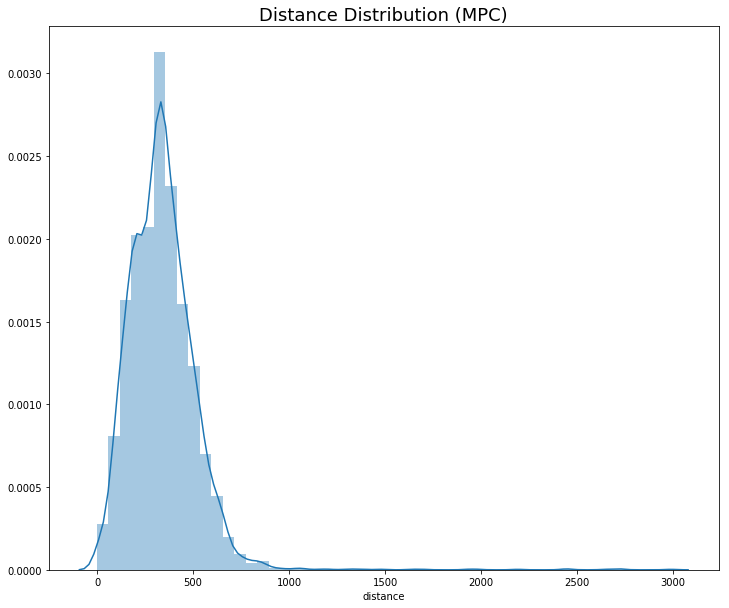

In [10]:
import seaborn as sb

fig = plt.figure(figsize=(12,10))
sb.distplot(dfgal['redshift'])
plt.title('Redshift Distribution',fontsize=18)
plt.show()

fig = plt.figure(figsize=(12,10))
sb.distplot(dfgal['distance'])
plt.title('Distance Distribution (MPC)',fontsize=18)
plt.show()

In [11]:
dfgal['redshift'].describe()

count    4998.000000
mean        0.080325
std         0.046036
min        -0.000513
25%         0.051216
50%         0.077330
75%         0.101164
max         0.855881
Name: redshift, dtype: float64

In [12]:
dfgal['distance'].describe()

count    4998.000000
mean      339.207034
std       182.396606
min        -2.220465
25%       219.028538
50%       328.781154
75%       427.792624
max      2988.292446
Name: distance, dtype: float64